# nmi | spring 2024
## lecture 14 : analysis of ivp solvers



### 6.2 analysis of ivp solvers

decreasing step size decreases error with eulers as it did with the trapezoid rule and simpsons rule. but remember that caveat with machine error mentioned during integration wrt rounding.

#### 6.2.1 local and global truncation error

next look closer at error incurred by eulers. given
</br></br>

\begin{align}
  \text{some ivp}\quad
  \left\{ \quad
    \begin{array}{l}
      y' = f(t,y) \\
      y(a) = y_a \\
      t \in [a,b].
    \end{array}
  \right.
\end{align}
</br>

error aggregates, so step $i$ includes all previous error. consider two error terms:
</br></br>

\begin{align}
  \text{global truncation error} &\quad g_i = |w_i - y_i| \\
  \text{local truncation error} &\quad e_{i+1} = |w_{i+1} - z_{i+1}|
\end{align}
</br>

where $e_{i+1}$ is error incurred by only by step $i+1$. ie, $g_{i+1} = g_i + e_{i+1}$. ie,
</br>


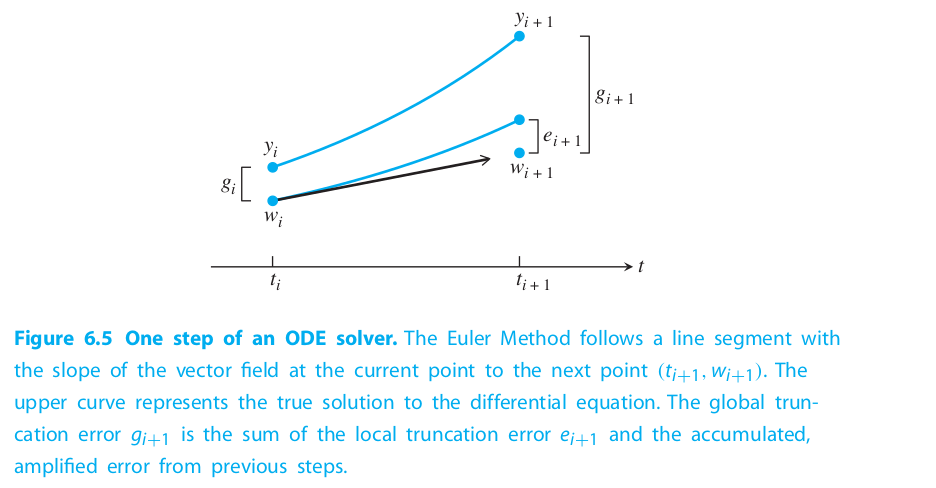

##### example 07


find local truncation error for eulers method.
</br>


assume $w_i$ exact and solve for $w_{i+1}$ and compare with actual $y(t_{i+1})$.
</br></br>

if $y''$ continuous then exact solution at $t_{i+1} = t_i + h$ is
</br></br>

$$y(t_i + h) = y(t_i) + hy'(t_i) + \frac{h^2}{2}y''(c)$$
</br>

by taylors for some $t_i < c < t_{i+1}$. bc $y(t_i) = w_i$ and $y'(t_i) = f(t_i,w_i)$
</br></br>

$$\Rightarrow y(t_{i+1}) = w_i + hf(t_i,w_i) + \frac{h^2}{2}y''(c)$$
</br>

compare with eulers,
</br></br>

$$\Rightarrow w_{i+1} = w_i + hf(t_i,w_i)$$
</br>

therefore, error
</br></br>

$$\Rightarrow e_{i+1} = |w_i - y(t_i,w_i)| = \frac{h^2}{2}|y''(c)|$$
</br>

for some $c$ in the interval. if $M$ is an  upper bound for $y''$ on $[a,b]$ then local truncation error statisfies $e_i \le M\frac{h^2}{2}$. $\checkmark$


##### rolling local into global error


wrt how to accumulate local error into global error, consider initial condition $y(a) = y_a$.
</br></br>

\begin{align}
  g_0 &= |w_0 - y_0| = |y_a - y_a| = 0 \\
  g_1 &= g_0 + e_1 = 0 + |w_1 - y_1| = |w_1 - y_1|
\end{align}
</br>

then define $z(t)$ as the solution to the initial value problem
</br></br>

\begin{align}
  \text{ivp}_{i = 1+}\quad
  \left\{ \quad
    \begin{array}{l}
      y' = f(t,y) \\
      y(t_1) = w_1 \\
      t \in [t_1,t_2].
    \end{array}
  \right.
\end{align}
</br>

ie, $z(t_2)$ is the exact solution starting at initial condition $(t_1,w_1)$.
</br></br>

<i>note that the intial condition was $(t_1,y_1)$ would yield $y_2$, the actual solution.</i>
</br></br>

continuing, $e_2 = |w_2 - z(t_2)|$ is the local truncation error of step $i=2$. now apply th 6.3 to difference $|z(t_2) - y_2|$.
</br></br>

\begin{align}
  g_2 = |w_2 - y_2| &= |w_2 - z(f_2) +z(f_2) - y_2| \\
  &\le |w_2 - z(f_2)| + |z(f_2) - y_2| \\
  &\le e_2 + e^{Lh}g_1 \\
  &= e_2 + e^{Lh}e_1 \\
  \Downarrow\quad\quad\quad\quad \\
  g_3 = |w_3 - y_3| &\le e_3 + e^{Lh}g_2 \le e_3 + e^{Lh}e_2 + e^{2Lh}e_1 \\
  \Downarrow\quad\quad\quad\quad \\
  g_i = |w_i - y_i| &\le e_i + e^{Lh}e_{i-1} + e^{2Lh}e_{i-2} + \dots + e^{(i-1)Lh}e_1
\end{align}
</br>


the previous example demonstrated local truncation error proportional to $h^2$. more generally local truncation error satisfies
</br></br>

$$e_i \le Ch^{k+1}$$
</br>

for some integer $k$ and constant $C>0$. then
</br></br>

\begin{align}
  g_i &\le Ch^{k+1}(1 + e^{Lh} + \dots + e^{(i-1)Lh}) \\
  &= Ch^{k+1}\frac{e^{iLh} - 1}{e^{Lh} - 1} \\
  &\le Ch^{k+1}\frac{e^{L(t_i-a)} - 1}{Lh} \\
  &= \frac{Ch^k}{L}(e^{L(t_i-a)} - 1).
\end{align}
</br>

ie, the local truncation error is proportional to $h^{k+1}$ for some $k$ and the global trunction error aggregates the local truncation error over a number of steps proportional to the reciprocal of $h$; therefore, global error is proportional to $h^k$.


##### <b><font color=grey>theorem 04</font> convergence for one-step differential equation solvers</b>


assume that $f(t,y)$ has lipschitz contant $L$ for variable $y$ and that the value of $y_i$ of the solution of the IVP at $t_i$  is approximated by $w_i$ from a one-step ODE solver with a local truncation error $e_i \le CH^{k+1}$ for some constant $C$ and $k\ge0$. then for each $a<t_i<b$, the solver has global truncation error
</br></br>

$$g_i = |w_i - y_i| \le \frac{Ch^k}{L}(e^{L(t_i-a)}-1).$$
</br>

ie, if an ODE solver satisifed the above as $h \rightarrow 0$, then the solver has <b>order</b> k. for the previous example bounded by $\frac{Mh^2}{2}$, eulers method is of order 1.
</br>


##### <b><font color=grey>corollary 05</font> eulers method convergence</b>


assume that $f(t,y)$ has a lipschitz constant $L$ for the variable $y$ and the solution $y_i$ of IVP at $t_i$ is approximated by $w_i$ using eulers method. let $M$ be upper bpimd fpr $|y''(t)|$ on $[a,b]$. then
</br></br>

$$|w_i - y_i| \le \frac{Mh}{2L}(e^{L(t_i-a}-1).$$
</br>


##### example 08


example 08 revisits example 01. find an error bound for eulers method.
</br></br>

\begin{align}
  \textrm{example 08} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 \\
      y(0) = y_0 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>


$L=1$ on $[0,1]$ and solution $y(t) = 3e^{\frac{t^2}{2}} - t^2 - 2$ is known. also $y''(t) = (t^2+2)e^{\frac{t^2}{2}}-2$ whose absolute value is bounded above on $[0,1]$ by $M=y''(1)=3\sqrt{e}-2$. by co 6.5, global truncation error at $t=1$ must be smaller than
</br></br>

$$\frac{Mh}{2L}e^L(1-0) = \frac{3\sqrt{e}-2}{2}eh \approx 4.004h.$$
</br>


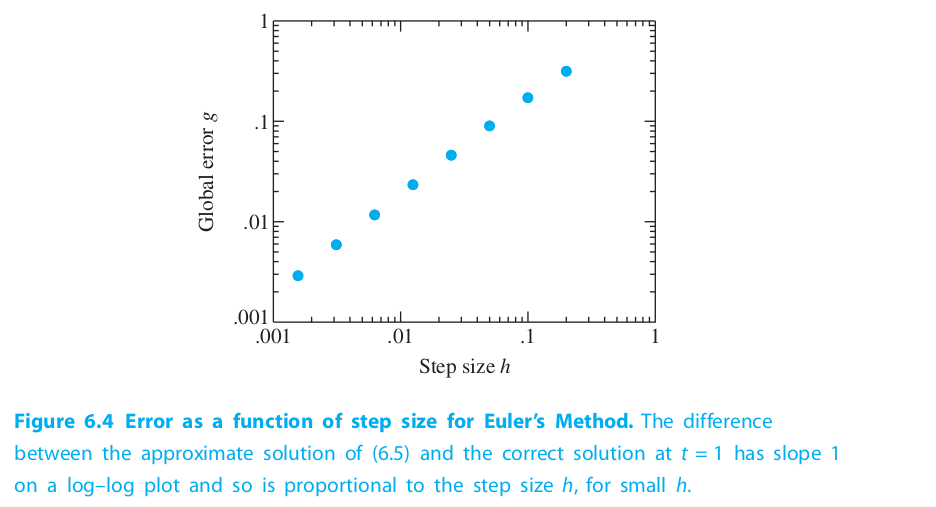

##### usw


theorem 04 is the main theorem on convergence of one-step differential equation solvers. so as $h$ decreases, error decreases; however, if $t$ spans a large interval, the step-size required to keep error in check may become impractical. which would be why eulers method doesnt get much play outside classrooms.

##### example 09


apply eulers to IVP at $t=0$.
</br></br>

\begin{align}
  \textrm{example 09} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = -4t^3y^2 \\
      y(-10) = \frac{1}{10001} \\
      t \in [-10,0]
    \end{array}
  \right.
\end{align}
</br>


the exact solution is $y(t) = \frac{1}{t^4+1}$ and it is well behaved on the interval of interest.
</br></br>

the figure below shows eulers approximation with step sizes $h=10^{-3},10^{-4},10^{-5}$ from bottom to top. $y(0) = 1$. the last step size gets the best results but requires one million steps to get there from the initial condition! so. next method!
</br>


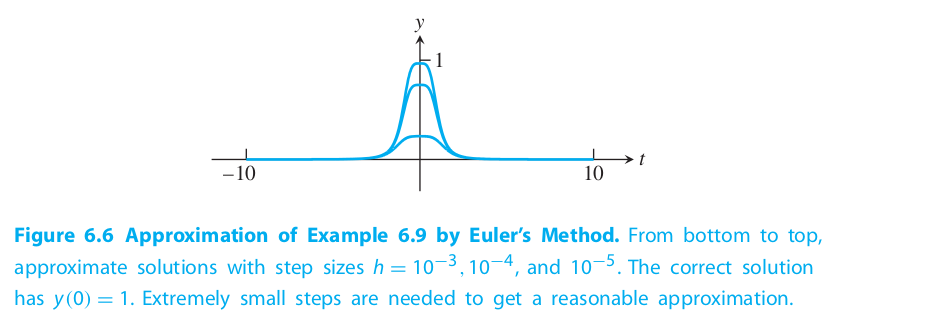

#### 6.2.2 explicit trapezoid


##### algorithm


eulers method tweaked.
</br></br>

<b>explicit trapezoid method</b>

\begin{align}
  w_0 &= y_0 \\
  w_{i+1} &= w_i + \frac{h}{2}\cdot (f(t_i,w_i) + f(t_i + h,w_i + h\cdot f(t_i,w_i))
\end{align}
</br>


##### usw


eulers uses the slope $y(t_i)$ taken at the left end point of interval $[t_i,t_{i+1}]$, and trapezoid uses, surprise, the average between the contribution there $y(t_i)$ and the slope $f(t_i+h,w_i+hf(t_i,w_i))$ from the right end point that eulers would have given. eulers "prediction" is used as the $w$-value to evaluate the slope function $f$ at $t_i+1 = t_i + h$. ie, trapezoid corrects eulers method.
</br></br>

both trapezoid and eulers are explicit methods bc $w_i+1$ is determined by an explicit formula in terms of previous $w_i$,$t_i$, and $h$.
</br>

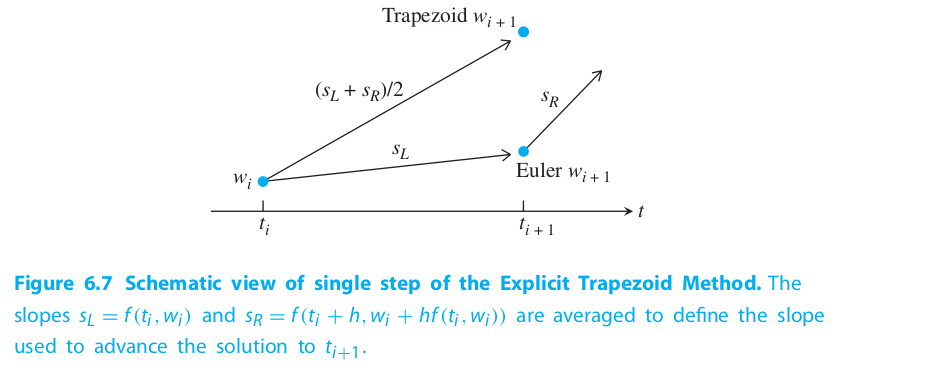

franken-schematic up there doesnt look like a trapezoid but the reason for the name is bc if $f(t,y)$ is independent of $y$, then
</br></br>

$$w_{i+1} = w_i + \frac{h}{2}[f(t_i)+f(t_i+h)]$$
</br>

can be viewed as adding a trapezoid rule approximation of $\int_{t_1}^{t_1+h}f(t)dt$ to the current $w_i$. bc
</br></br>

$$\int_{t_1}^{t_1+h}f(t)dt = \int_{t_1}^{t_1+h}y'(t)dt = y(t+i+h)-y(t_i),$$
</br>

this is solving $y'=f(t)$ by integrating using the trapezoid rule. this rule is also called improved euler and the heun method.
</br>


##### example 10


apply explicit trapezoid.
</br></br>

\begin{align}
  \textrm{example 10} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 = f(t,y) \\
      y(0) = y_0 = 1 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>


\begin{align}
  w_0 &= y_0 = 1 \\
  w_{i+1} &= w_i + \frac{h}{2}(f(t_i,w_i)+f(t_i+h,w_i+hf(t_i,w_i))) \\
  &= w_i + \frac{h}{2}(t_iw_i+t_i^3 + (t_i+h)(w_i+h(t_iy_i + t_i^3))+(t_i+h)^3).
\end{align}
</br>

step size $h=0.1$ gets you this table of better error.
</br>


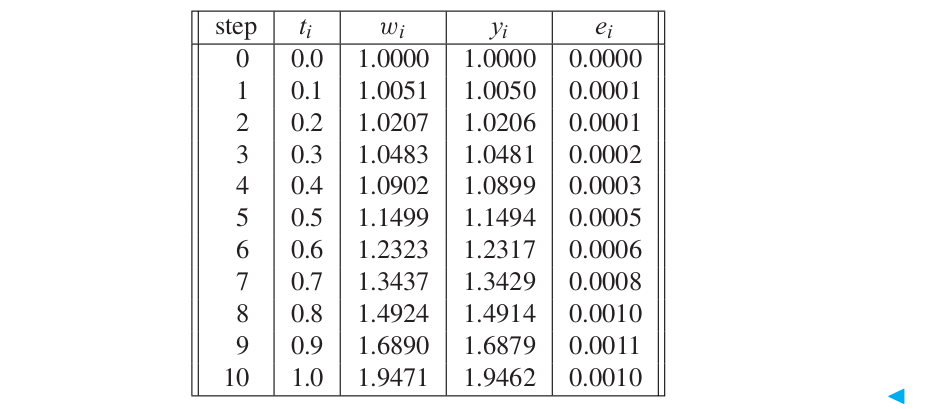

and so does this.
</br>


###### code


In [ ]:
import numpy as np
import pandas as pd

def main():
  #w[0] = y[0]
  #w[i+1] = w[i] + h/2. *( f(t[i],w[i]) + f(t[i]+h, w[i]+hf(t[i],w[i])) )

  F = lambda t,y: t*y + pow(t,3)
  Y = lambda t: 3.*np.exp(t*t/2.) - t*t -2. # for error calc

  t0 = 0.
  v0 = w0 = y0 = Y(t0)
  h = 0.1
  n = int((1.-0.)/h) # points

  rc = np.zeros((n+1,7)) # i,t,w,y,e,v,e
  rc[0:] = [0,t0,y0,w0,abs(y0-w0),v0,abs(y0-v0)]

  for i in range(1,n+1):
    ti = h*i

    # heuns method / explicit trapezoid
    wi = w0 + (h/2)*(F(t0,w0) + F(t0+h,w0+h*F(t0,w0)))
    yi = Y(ti)

    # eulers
    vi = v0 + h*F(t0,v0)

    rc[i:] = [i,ti,yi,wi,abs(yi-wi),vi,abs(yi-vi)]
    #print(f"step {i:02d} : t = {ti:.01f} : y[{i:02d}] = {yi:.4f} : w[{i:02d}] = {wi:.4f} : e[{i:02d}] = {abs(yi-wi):.4f}")
    t0 = ti
    w0 = wi
    v0 = vi

  nCol = ['n','t','y,truth','heun','err,h','euler','err,e'] # column names, surprise
  nRow = [rc[:,0]] # labeled each row with its associated n value
  # pd.set_option('display.colheader_justify','center') # liars
  df = pd.DataFrame(data=rc,index=nRow,columns=nCol)
  print(df)

if __name__ == "__main__":
  main()


,n,t,"y,truth",heun,"err,h",euler,"err,e"
0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
1.000000,1.000000,0.100000,1.005038,1.005050,0.000012,1.000000,0.005038
2.000000,2.000000,0.200000,1.020604,1.020677,0.000073,1.010100,0.010504
3.000000,3.000000,0.300000,1.048084,1.048262,0.000179,1.031102,0.016982
4.000000,4.000000,0.400000,1.089861,1.090185,0.000323,1.064735,0.025126
5.000000,5.000000,0.500000,1.149445,1.149943,0.000498,1.113724,0.035721
6.000000,6.000000,0.600000,1.231652,1.232340,0.000688,1.181911,0.049741
7.000000,7.000000,0.700000,1.342864,1.343736,0.000872,1.274425,0.068439
8.000000,8.000000,0.800000,1.491383,1.492400,0.001017,1.397935,0.093448
9.000000,9.000000,0.900000,1.687908,1.688981,0.001074,1.560970,0.126938


##### usw: more about error


for local truncation error, assume $(t_i,y_i)$ correct and extend to $t_{i+1}$ via taylor expansion.
</br>



\begin{align}
  y_{i+1} &= y(t_i + h) = y_i + hy'(t_i) + \frac{h^2}{2}y''(t_+i) + \frac{h^3}{6}y'''(c), \\
  &\quad \text{ for } c \text{ between } t_i \text{ and } t_{i+1} \text{ and continuous } y'''\\
  \\
  &\quad\Downarrow \\
  \\
  &\quad y''(t) = \frac{\partial f}{\partial t}(t,y) + \frac{\partial f}{\partial y}(t,y)y'(t) = \frac{\partial f}{\partial t}(t,y) + \frac{\partial f}{\partial y}(t,y)f(t,y) \\
  \\
  &\quad\Downarrow \\
  \\
  y_{i+1} &= y_i + h(f(t_i,y_i) + \frac{h^2}{2}\left( \frac{\partial f}{\partial t}(t,y) + \frac{\partial f}{\partial y}(t,y)f(t,y) \right) + \frac{h^3}{6}y'''(c)
\end{align}
</br>



rewrite explicit trapezoid with 2d taylor expansion.
</br></br>

\begin{align}
  w_{i+1} &= y_i + \frac{h}{2}\left( f(t_i,y_i) + f(t_i+h,y_i+hf(t_i,y_i)) \right) \\
  \\
  &\quad\Downarrow \\
  \\
  &\quad f(t_i + h,y_i+hf(t_i,y_i)) = f(t_i,y_i) + h\frac{\partial f}{\partial t}(t_i,y_i) + hf(t_i,y_i)\frac{\partial f}{\partial y}(t_i,y_i) + \mathcal{O}(h^2) \\
  \\
  &\quad\Downarrow \\
  \\
  &= y_i + \frac{h}{2}f(t_i,y_i) + \frac{h}{2}\left( f(t_i,y_i) + h\left(\frac{\partial f}{\partial t}f(t_i,y_i) + f(t_i,y_i)\frac{\partial f}{\partial y}(t_i,y_i)\right) + \mathcal{O}(h^2) \right) \\
  &= y_i + hf(t_i,y_i) + \frac{h^2}{2}\left( \frac{\partial f}{\partial t}f(t_i,y_i) + f(t_i,y_i)\frac{\partial f}{\partial y}(t_i,y_i)\right) + \mathcal{O}(h^3)
\end{align}
</br>


which reduces to
</br></br>

$$y_{i+1} - w_{i+1} = \mathcal{O}(h^3).$$
</br>
theorem 04 shows that trapezoid global error is proportional to $h^2$, meaning the method is order two.
</br>


to improve an approximation evaluated with step size h (a) halve the step size of a ﬁrst-order method, multiplying the global error by 1/2 or (b) keep the same step size with a second-order method (ie, replacing $h$ with $h^2$, multipying global error by $h$). ie, for small $h$, choose (b).
</br>

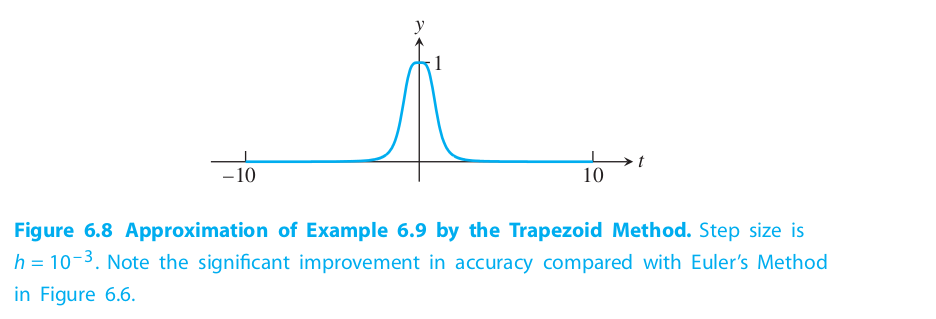

##### example 11


example eleven revisits example nine. see how nice that error is now?
</br></br>

\begin{align}
  \textrm{example 11} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = -4t^3y^2 \\
      y(-10) = \frac{1}{10001} \\
      t \in [-10,0]
    \end{array}
  \right.
\end{align}
</br>

the exact solution is $y(t) = \frac{1}{t^4+1}$.
</br></br>

supposedly this is a difficult IVP but CPU doesnt care.
</br>


###### code


In [ ]:
import numpy as np
import pandas as pd

def main():
  F = lambda t,y: -4.*pow(t,3)*pow(y,2)
  Y = lambda t: 1./(pow(t,4) + 1.) # for error calc

  t0 = t1 = th = -10.
  tf = 0.
  v1 = w1 = y1 = Y(t0)
  h = 1e-5
  n = round((tf-t0)/h) # points
  hh = 1e-3
  ih = round(hh/h)

  irows = round(tf-t0+1)
  isave = round(1/h)
  rc = np.zeros((irows,6)) # t,w,y,e,v,e # i is messy
  rc[0:] = [t1,y1,w1,abs(y1-w1),v1,abs(y1-v1)]

  for i in range(1,n+1):
    t2 = t0 + h*i
    y2 = Y(t2)

    if (i%ih) == 0: # runs less bc smaller step size
      # heuns method / explicit trapezoid
      w2 = w1 + (hh/2)*(F(th,w1) + F(th+hh,w1+hh*F(th,w1)))

    # eulers
    v2 = v1 + h*F(t1,v1)

    if (i%isave) == 0: # only 11 values bc tmi
      irow = round(i/isave)
      rc[irow:] = [t2,y2,w2,abs(y2-w2),v2,abs(y2-v2)]

    t1 = t2
    if (i%ih) == 0:
      th = t2
      w1 = w2
    v1 = v2

  nCol = ['t','y,truth','he@1e-3','err,h','eu@1e-5','err,e'] # column names, surprise
  df = pd.DataFrame(data=rc,columns=nCol)
  print(df)

if __name__ == "__main__":
  main()


,t,"y,truth",he@1e-3,"err,h",eu@1e-5,"err,e"
0,-10.000000,0.000100,0.000100,0.000000,0.000100,0.000000
1,-9.000000,0.000152,0.000152,0.000000,0.000152,0.000000
2,-8.000000,0.000244,0.000244,0.000000,0.000244,0.000000
3,-7.000000,0.000416,0.000416,0.000000,0.000416,0.000000
4,-6.000000,0.000771,0.000771,0.000000,0.000771,0.000000
5,-5.000000,0.001597,0.001597,0.000000,0.001597,0.000000
6,-4.000000,0.003891,0.003891,0.000000,0.003891,0.000000
7,-3.000000,0.012195,0.012195,0.000000,0.012190,0.000005
8,-2.000000,0.058824,0.058819,0.000005,0.058710,0.000114
9,-1.000000,0.500000,0.499635,0.000365,0.491842,0.008158


#### 6.2.3 taylor methods


order one, order two and then theres taylor. ie,
</br></br>

$$y(t+h) = y(t) + hy'(t) + \frac{1}{2}h^2y''(t) + \dots + \frac{h^k}{k!}y^{(k)}(t) + \frac{h^{K+1}}{(k+1)!}y^{(k+1)}(c)$$
</br>

for $c$ between $t$ and $t+h$.
</br>



##### algorithm



```
# taylor method of order k

```
\begin{align}
  w_0 &= y_0 \\
  w_{i+1} &= w_i + hf(t_i,w_i) + \frac{h^2}{2!}f'(t_1,w_i) + \dots + \frac{h^k}{k!}f^{(k-1)}(t_i,w_i).
\end{align}
</br>


\begin{align}
  f'(t,y) &= f_t(t,y) + f_y(t,y)y'(t) \\
  &= f_t(t,y) + f_y(t,y)f(t,y)
\end{align}
</br>

for local error, $w_i = y_i$
</br></br>

$$ y_{i+1} - w_{i+1} = \frac{h^{k+1}}{(k+1)!}y^{(k+1)}(c).$$
</br>

ie, taylor method of order $k$ has local truncation error $h^{k+1}$.
</br></br>

also, first order taylors is euler and second order taylors is
</br></br>

$$w_{i+1} = w_i + hf(t_i,w_i) + \frac{1}{2}h^2(f_t(t_i,w_i)+f_y(t_i,w_i)f(t_i,w_i)).$$
</br>


##### example 12


example twelve revisits example one. determine second-order taylors.
</br></br>

\begin{align}
  \textrm{example 12} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 = f(t,y) \\
      y(0) = y_0 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>


note: exact solution is $y(t) = \frac{1}{t^4+1}$.
</br></br>

\begin{align}
  f'(t,y) &= f_t + f_yf \\
  &= y + 3t^2 + t(ty+t^3) \\
  \\
  &\quad\Downarrow \\
  \\
  w_{i+1} &= w_i + h(t_iw_i + t_i^3) + \frac{h^2}{2!}(w_i + 3t_i^2 + t_i(t_iw_i + t_i^3))
\end{align}
</br>


note: bc the partials require human effort (sorta) taylors is mostly for special circumstances. lol.
</br>